# Setup and imports

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Research/Probe Automatic Review Generators/New_Reviews/'

In [ ]:
import pandas as pd
import numpy as np
import nltk
import sklearn
import torch
import math
import re
import gensim
import json

import matplotlib.pyplot as plt
from statistics import mean
from collections import Counter
from numpy import argmax
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('punkt')
!pip install transformers
from transformers import AutoTokenizer, AutoModel

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 2.5MB 8.7MB/s 
     |████████████████████████████████| 3.3MB 39.9MB/s 
     |████████████████████████████████| 901kB 31.2MB/s 


# Data

In [ ]:
f = open(path + '/Exp0/reviews_0.txt')
row = []
for x in f:
    grp = re.match(r'(.*?)_(.*?)\s=\s(.*)', x)
    review_no = grp.group(1)
    arxivId = str(grp.group(2))
    if grp.group(3) is None:
        review = ''
    else:
        review = str(grp.group(3))
    row.append([review_no, arxivId, review])
df = pd.DataFrame()
df['review_no'] = [i[0] for i in row]
df['arxivId'] = [i[1] for i in row]
df['review'] = [i[2] for i in row]
df.to_csv(path + 'reviews_0.csv', index=False)

In [ ]:
df0 = pd.read_csv(f'{path}/Exp0/reviews_0.csv'); df0.head(10)

,review_no,arxivId,review
0,1,2012.04715,"In this paper , the authors attempt to solve L..."
1,1,1810.00826,This paper studies the expressive power of gra...
2,1,1907.07355,This paper studies the effect of spurious stat...
3,1,1904.11943,"This paper proposes SWALP , an approach to low..."
4,1,1902.04911,This paper proposes an end-to-end neural model...
5,1,2005.06628,This paper proposes a pruning approach to redu...
6,1,2102.07983,This paper introduces FEWS ( Few-shot Examples...
7,1,1812.02425,This paper proposes to use a teacher-student e...
8,1,1901.06829,This paper proposes a novel approach to the ta...
9,1,1909.07557,This paper studies the Housing Market problem ...


In [ ]:
f = open(path + 'Exp1/reviews_1.txt')
row = []
for x in f:
    grp = re.match(r'(.*?)_(.*?)\s=\s(.*)', x)
    review_no = grp.group(1)
    arxivId = str(grp.group(2))
    if grp.group(3) is None:
        review = ''
    else:
        review = str(grp.group(3))
    row.append([review_no, arxivId, review])
df = pd.DataFrame()
df['review_no'] = [i[0] for i in row]
df['arxivId'] = [i[1] for i in row]
df['review'] = [i[2] for i in row]
df.to_csv(path + 'reviews_1.csv', index=False)

In [ ]:
df1 = pd.read_csv(f'{path}/Exp1/reviews_1.csv'); df1.head(10)

,review_no,arxivId,review
0,1,2012.04715,"In this paper , the authors tackle the problem..."
1,1,1810.00826,This paper studies the expressive power of gra...
2,1,1907.07355,This paper studies the effect of spurious stat...
3,1,1904.11943,"This paper proposes SWALP , an approach to low..."
4,1,1902.04911,This paper proposes an end-to-end neural model...
5,1,2005.06628,This paper proposes a pruning approach to redu...
6,1,2102.07983,This paper introduces a new low-shot WSD datas...
7,1,1812.02425,This paper proposes a method for compressing l...
8,1,1901.06829,This paper proposes a reinforcement learning b...
9,1,1909.07557,This paper studies the Housing Market problem ...


In [ ]:
f = open(path + 'reviews_2.txt')
row = []
for x in f:
    grp = re.match(r'(.*?)_(.*?)\s=\s(.*)', x)
    review_no = grp.group(1)
    arxivId = str(grp.group(2))
    if grp.group(3) is None:
        review = ''
    else:
        review = str(grp.group(3))
    row.append([review_no, arxivId, review])
df = pd.DataFrame()
df['review_no'] = [i[0] for i in row]
df['arxivId'] = [i[1] for i in row]
df['review'] = [i[2] for i in row]
df.to_csv(path + 'reviews_2.csv', index=False)

In [ ]:
df2 = pd.read_csv(f'{path}/Exp2/reviews_2.csv'); df2.head(10)

,review_no,arxivId,review
0,1,2012.04715,"In this paper , the authors attempt to solve t..."
1,1,1810.00826,This paper studies the expressive power of gra...
2,1,1907.07355,This paper studies the effect of spurious stat...
3,1,1904.11943,"This paper proposes SWALP , an approach to low..."
4,1,1902.04911,This paper proposes an end-to-end neural model...
5,1,2005.06628,This paper proposes a pruning approach to redu...
6,1,2102.07983,This paper introduces a new low-shot WSD datas...
7,1,1812.02425,This paper proposes a method for compressing l...
8,1,1901.06829,This paper proposes a reinforcement learning b...
9,1,1909.07557,This paper studies the Housing Market problem ...


In [ ]:
f = open(path + 'reviews_1_asc.txt')
row = []
for x in f:
    grp = re.match(r'(.*?)_(.*?)\s=\s(.*)', x)
    review_no = grp.group(1)
    arxivId = str(grp.group(2))
    if grp.group(3) is None:
        review = ''
    else:
        review = str(grp.group(3))
    row.append([review_no, arxivId, review])
df = pd.DataFrame()
df['review_no'] = [i[0] for i in row]
df['arxivId'] = [i[1] for i in row]
df['review'] = [i[2] for i in row]
df.to_csv(path + 'reviews_1_asc.csv', index=False)

In [ ]:
df_asc = pd.read_csv(f'{path}/Exp1/reviews_1_asc.csv'); df_asc.head(10)

,review_no,arxivId,review
0,1,2012.04715,"In this paper , the authors attempt to solve L..."
1,1,1810.00826,This paper studies the expressive power of gra...
2,1,1907.07355,This paper studies the effect of spurious stat...
3,1,1904.11943,"This paper proposes SWALP , an approach to low..."
4,1,1902.04911,This paper proposes an end-to-end neural model...
5,1,2005.06628,This paper proposes a pruning approach to redu...
6,1,2102.07983,This paper introduces a new low-shot WSD datas...
7,1,1812.02425,This paper proposes a method for compressing l...
8,1,1901.06829,This paper proposes a reinforcement learning b...
9,1,1909.07557,This paper studies the Housing Market problem ...


In [ ]:
f = open(path + 'reviews_1_dec.txt')
row = []
for x in f:
    grp = re.match(r'(.*?)_(.*?)\s=\s(.*)', x)
    review_no = grp.group(1)
    arxivId = str(grp.group(2))
    if grp.group(3) is None:
        review = ''
    else:
        review = str(grp.group(3))
    row.append([review_no, arxivId, review])
df = pd.DataFrame()
df['review_no'] = [i[0] for i in row]
df['arxivId'] = [i[1] for i in row]
df['review'] = [i[2] for i in row]
df.to_csv(path + 'reviews_1_dec.csv', index=False)

In [ ]:
df_dec = pd.read_csv(f'{path}/Exp1/reviews_1_dec.csv'); df_dec.head(10)

,review_no,arxivId,review
0,1,2012.04715,"In this paper , the authors attempt to solve L..."
1,1,1810.00826,This paper studies the expressive power of gra...
2,1,1907.07355,This paper studies the effect of spurious stat...
3,1,1904.11943,"This paper proposes SWALP , an approach to low..."
4,1,1902.04911,This paper proposes an end-to-end neural model...
5,1,2005.06628,This paper proposes a pruning approach to redu...
6,1,2102.07983,This paper introduces a new low-shot WSD datas...
7,1,1812.02425,This paper proposes a method for compressing l...
8,1,1901.06829,This paper proposes a reinforcement learning b...
9,1,1909.07557,This paper studies the Housing Market problem ...


# Specter embeddings

In [ ]:
titles = ["A SAT-based Resolution of Lam's Problem",
          "How Powerful are Graph Neural Networks?",
          "Probing Neural Network Comprehension of Natural Language Arguments",
          "SWALP : Stochastic Weight Averaging in Low-Precision Training",
          "Learning to Select Knowledge for Response Generation in Dialog Systems",
          "schuBERT: Optimizing Elements of BERT",
          "FEWS: Large-Scale, Low-Shot Word Sense Disambiguation with the Dictionary",
          "MEAL: Multi-Model Ensemble via Adversarial Learning",
          "Read, Watch, and Move: Reinforcement Learning for Temporally Grounding Natural Language Descriptions in Videos",
          "Object Reachability via Swaps under Strict and Weak Preferences"]

In [ ]:
from typing import Dict, List
import json

import requests


URL = "https://model-apis.semanticscholar.org/specter/v1/invoke"
MAX_BATCH_SIZE = 16


def chunks(lst, chunk_size=MAX_BATCH_SIZE):
    """Splits a longer list to respect batch size"""
    for i in range(0, len(lst), chunk_size):
        yield lst[i: i + chunk_size]


def embed(papers):
    embeddings_by_paper_id: Dict[str, List[float]] = {}

    for chunk in chunks(papers):
        # Allow Python requests to convert the data above to JSON
        response = requests.post(URL, json=chunk)

        if response.status_code != 200:
            raise RuntimeError(
                "Sorry, something went wrong, please try later!")

        for paper in response.json()["preds"]:
            embeddings_by_paper_id[paper["paper_id"]] = paper["embedding"]

    return embeddings_by_paper_id


def Embeddings(SAMPLE_PAPERS):
    all_embeddings = embed(SAMPLE_PAPERS)

    # Prints { 'A': [4.089589595794678, ...], 'B': [-0.15814849734306335, ...]
    # }
    return all_embeddings

In [ ]:
SAMPLE_PAPERS_0 = []

for i in range(len(df0)):
  paper = {"paper_id": str(i), "title": titles[i], "abstract": df0.iloc[i]["review"]}
  SAMPLE_PAPERS_0.append(paper)

all_embeddings_0 = Embeddings(SAMPLE_PAPERS_0)

In [ ]:
SAMPLE_PAPERS_1 = []

for i in range(len(df1)):
  paper = {"paper_id": str(i), "title": titles[i%10], "abstract": df1.iloc[i]["review"]}
  SAMPLE_PAPERS_1.append(paper)

all_embeddings_1 = Embeddings(SAMPLE_PAPERS_1)

In [ ]:
SAMPLE_PAPERS_2 = []

for i in range(len(df2)):
  paper = {"paper_id": str(i), "title": titles[i%10], "abstract": df2.iloc[i]["review"]}
  SAMPLE_PAPERS_2.append(paper)

all_embeddings_2 = Embeddings(SAMPLE_PAPERS_2)

In [ ]:
SAMPLE_PAPERS_asc = []

for i in range(len(df_asc)):
  paper = {"paper_id": str(i), "title": titles[i%10], "abstract": df_asc.iloc[i]["review"]}
  SAMPLE_PAPERS_asc.append(paper)

all_embeddings_asc = Embeddings(SAMPLE_PAPERS_asc)

In [ ]:
SAMPLE_PAPERS_dec = []

for i in range(len(df_dec)):
  paper = {"paper_id": str(i), "title": titles[i%10], "abstract": df_dec.iloc[i]["review"]}
  SAMPLE_PAPERS_dec.append(paper)

all_embeddings_dec = Embeddings(SAMPLE_PAPERS_dec)

# Specter Distances

In [ ]:
def transform(lines):
    tokens = [w for s in lines for w in s]
    results = []
    label_enc = sklearn.preprocessing.LabelEncoder()
    onehot_enc = sklearn.preprocessing.OneHotEncoder()
    encoded_all_tokens = label_enc.fit_transform(list(set(tokens)))
    encoded_all_tokens = encoded_all_tokens.reshape(len(encoded_all_tokens), 1)
    onehot_enc.fit(encoded_all_tokens)
    for text_tokens in lines:
        encoded_words = label_enc.transform(text_tokens)
        encoded_words = encoded_words.reshape(len(encoded_words), 1)
        encoded_words = onehot_enc.transform(encoded_words)
        results.append(np.sum(encoded_words.toarray(), axis=0))
    return results


def calculate_position(values):
    x = []
    for pos, matrix in enumerate(values):
        if matrix > 0:
            x.append(pos)
    return x


def padding(sentence1, sentence2):
    x1 = sentence1.copy()
    x2 = sentence2.copy()
    diff = len(x1) - len(x2)
    if diff > 0:
        for i in range(0, diff):
            x2.append(-1)
    elif diff < 0:
        for i in range(0, abs(diff)):
            x1.append(-1)
    return x1, x2


def cosine(reviews):
    cosine_dist = []
    for i in range(len(reviews)):
        for j in range(len(reviews)):
            if i != j:
                score = sklearn.metrics.pairwise.cosine_similarity(
                    [reviews[i]], [reviews[j]])[0][0]
                rounded_score = "{:.2f}".format(score)
                cosine_dist.append(rounded_score)
    cosine_dist = list(map(float, cosine_dist))
    stats = {
        'min_val': min(cosine_dist),
        'max_val': max(cosine_dist),
        'mean_val': mean(cosine_dist)}
    return stats


def jaccard(reviews):
    text_tokens = [nltk.word_tokenize(i) for i in reviews]
    transformed_results = transform([i for i in text_tokens])
    jaccard_dist = []
    for i in range(len(reviews)):
        for j in range(len(reviews)):
            if i != j:
                y_actual = calculate_position(transformed_results[j])
                y_compare = calculate_position(transformed_results[i])
                x1, x2 = padding(y_actual, y_compare)
                score = 1 - gensim.matutils.jaccard(x1, x2)
                rounded_score = "{:.2f}".format(score)
                jaccard_dist.append(rounded_score)
    jaccard_dist = list(map(float, jaccard_dist))
    stats = {
        'min_val': min(jaccard_dist),
        'max_val': max(jaccard_dist),
        'mean_val': mean(jaccard_dist)}
    return stats

def cosine_rel(main, reviews):
    compare_with = [main]
    cosine_dist = []
    for i in range(len(reviews)):
        score = sklearn.metrics.pairwise.cosine_similarity(
            compare_with, [reviews[i]])[0][0]
        rounded_score = "{:.2f}".format(score)
        cosine_dist.append(rounded_score)
    cosine_dist = list(map(float, cosine_dist))
    stats = {
        'min_val': min(cosine_dist),
        'max_val': max(cosine_dist),
        'mean_val': mean(cosine_dist)}
    return stats


def jaccard_rel(main, reviews):
    main_token = nltk.word_tokenize(main[0])
    compare_with = transform([main_token])
    text_tokens = [nltk.word_tokenize(i) for i in reviews]
    transformed_results = transform([i for i in text_tokens])
    jaccard_dist = []
    for i in range(len(reviews)):
        y_actual = calculate_position(np.array(compare_with)[0])
        y_compare = calculate_position(transformed_results[i])
        x1, x2 = padding(y_actual, y_compare)
        score = 1 - gensim.matutils.jaccard(x1, x2)
        rounded_score = "{:.2f}".format(score)
        jaccard_dist.append(rounded_score)
    jaccard_dist = list(map(float, jaccard_dist))
    print(jaccard_dist)
    stats = {
        'min_val': min(jaccard_dist),
        'max_val': max(jaccard_dist),
        'mean_val': mean(jaccard_dist)}
    return stats

# Specter plots

## Exp 1

### Random Shuffle

In [ ]:
from matplotlib.gridspec import GridSpec

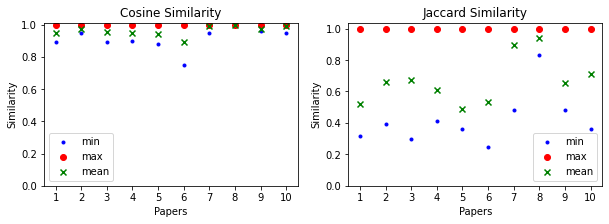

In [ ]:
fig = plt.figure(figsize=(10, 3))
gs = GridSpec(nrows=1, ncols=2)

ax = fig.add_subplot(gs[0, 0])
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_1)):
      if j%10 == i:
        embeds.append(all_embeddings_1[f"{j}"])
    vals = cosine(embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

ax1 = fig.add_subplot(gs[0, 1])
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df1)):
      if j%10 == i:
        new_df = new_df.append(df1.iloc[j])
    vals = jaccard(new_df["review"])
    ax1.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax1.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax1.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax1.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

plt.savefig(f'{path}/Exp1/inter_results', dpi=100)
plt.show()

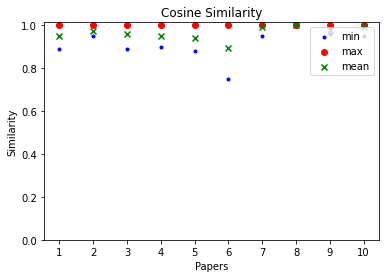

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_1)):
      if j%10 == i:
        embeds.append(all_embeddings_1[f"{j}"])
    vals = cosine(embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/exp1_cosine', dpi=100)
plt.show()

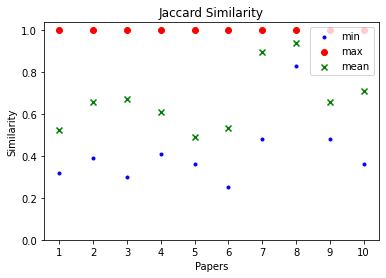

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df1)):
      if j%10 == i:
        new_df = new_df.append(df1.iloc[j])
    vals = jaccard(new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/exp1_jaccard', dpi=100)
plt.show()

[0.18, 0.18, 0.3, 0.28, 0.18, 0.16, 0.23, 0.18, 0.18, 0.18]
[0.44, 0.39, 0.47, 0.35, 0.44, 0.44, 0.34, 0.44, 0.44, 0.44]
[0.47, 0.47, 0.25, 0.25, 0.47, 0.47, 0.56, 0.47, 0.47, 0.47]
[0.31, 0.31, 0.3, 0.39, 0.28, 0.3, 0.41, 0.28, 0.28, 0.17]
[0.33, 0.35, 0.33, 0.3, 0.29, 0.37, 0.35, 0.37, 0.3, 0.37]
[0.32, 0.28, 0.35, 0.32, 0.33, 0.39, 0.33, 0.33, 0.2, 0.33]
[0.66, 0.66, 0.66, 0.61, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66]
[0.67, 0.64, 0.67, 0.64, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67]
[0.37, 0.41, 0.43, 0.41, 0.44, 0.43, 0.4, 0.38, 0.41, 0.41]
[0.29, 0.39, 0.39, 0.41, 0.41, 0.4, 0.39, 0.39, 0.39, 0.39]


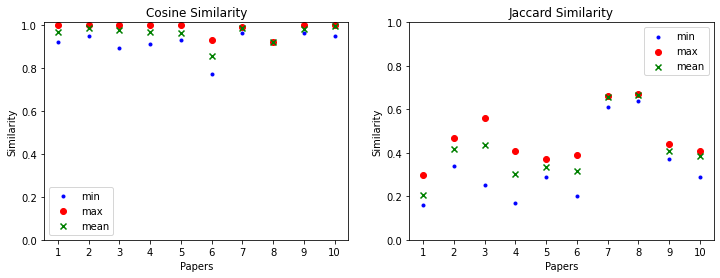

In [ ]:
fig = plt.figure(figsize=(12, 4))
gs = GridSpec(nrows=1, ncols=2)

ax = fig.add_subplot(gs[0, 0])
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_1)):
      if j%10 == i:
        embeds.append(all_embeddings_1[f"{j}"])
    vals = cosine_rel(all_embeddings_0[f"{i}"], embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

ax1 = fig.add_subplot(gs[0, 1])
for i in range(10):
    main = df0["review"].iloc[i]
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df1)):
      if j%10 == i:
        new_df = new_df.append(df1.iloc[j])
    vals = jaccard_rel([main], new_df["review"])
    ax1.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax1.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax1.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax1.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

plt.savefig(f'{path}/Exp1/intra_results', dpi=100)
plt.show()

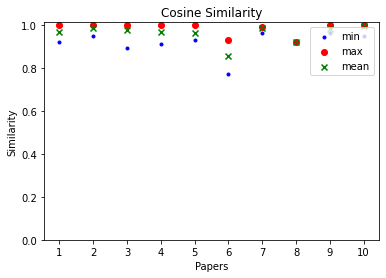

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_1)):
      if j%10 == i:
        embeds.append(all_embeddings_1[f"{j}"])
    vals = cosine_rel(all_embeddings_0[f"{i}"], embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/exp1_cosine_rel', dpi=100)
plt.show()

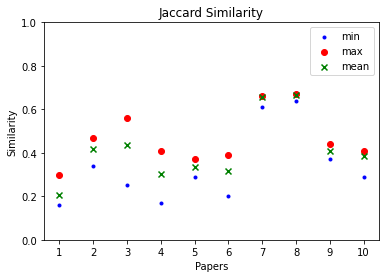

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    main = df0["review"].iloc[i]
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df1)):
      if j%10 == i:
        new_df = new_df.append(df1.iloc[j])
    vals = jaccard_rel([main], new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/exp1_jaccard_rel', dpi=100)
plt.show()

### Asc order

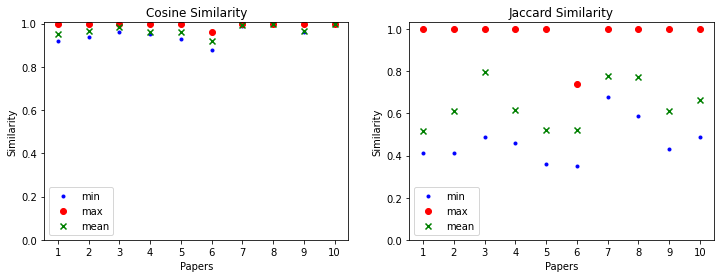

In [ ]:
fig = plt.figure(figsize=(12, 4))
gs = GridSpec(nrows=1, ncols=2)

ax = fig.add_subplot(gs[0, 0])
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_asc)):
      if j%10 == i:
        embeds.append(all_embeddings_asc[f"{j}"])
    vals = cosine(embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

ax1 = fig.add_subplot(gs[0, 1])
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df_asc)):
      if j%10 == i:
        new_df = new_df.append(df_asc.iloc[j])
    vals = jaccard(new_df["review"])
    ax1.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax1.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax1.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax1.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

plt.savefig(f'{path}/Exp1/ASC_inter_results', dpi=100)
plt.show()

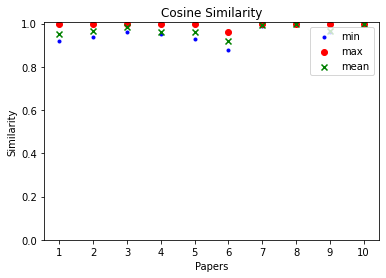

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_asc)):
      if j%10 == i:
        embeds.append(all_embeddings_asc[f"{j}"])
    vals = cosine(embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/exp1_asc_cosine', dpi=100)
plt.show()

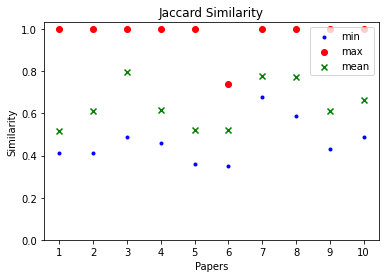

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df_asc)):
      if j%10 == i:
        new_df = new_df.append(df_asc.iloc[j])
    vals = jaccard(new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/exp2_asc_jaccard', dpi=100)
plt.show()

[0.31, 0.36, 0.25, 0.31, 0.36]
[0.46, 0.67, 0.67, 0.5, 0.67]
[0.56, 0.61, 0.56, 0.56, 0.56]
[0.5, 0.45, 0.44, 0.45, 0.49]
[0.38, 0.48, 0.5, 0.36, 0.5]
[0.46, 0.38, 0.41, 0.46, 0.34]
[0.66, 0.68, 0.66, 0.71, 0.66]
[0.45, 0.48, 0.48, 0.4, 0.45]
[0.6, 0.5, 0.58, 0.58, 0.47]
[0.45, 0.49, 0.42, 0.49, 0.45]


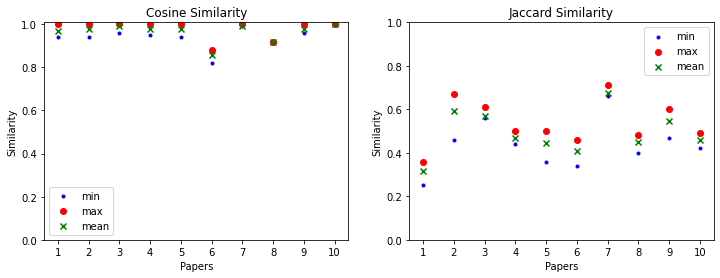

In [ ]:
fig = plt.figure(figsize=(12, 4))
gs = GridSpec(nrows=1, ncols=2)

ax = fig.add_subplot(gs[0, 0])
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_asc)):
      if j%10 == i:
        embeds.append(all_embeddings_asc[f"{j}"])
    vals = cosine_rel(all_embeddings_0[f"{i}"], embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

ax1 = fig.add_subplot(gs[0, 1])
for i in range(10):
    main = df0["review"].iloc[i]
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df_asc)):
      if j%10 == i:
        new_df = new_df.append(df_asc.iloc[j])
    vals = jaccard_rel([main], new_df["review"])
    ax1.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax1.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax1.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax1.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

plt.savefig(f'{path}/Exp1/ASC_intra_results', dpi=100)
plt.show()

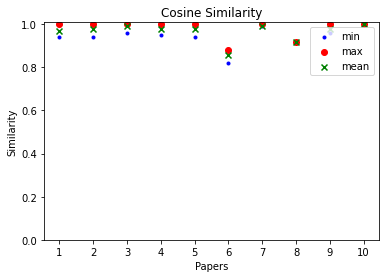

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_asc)):
      if j%10 == i:
        embeds.append(all_embeddings_asc[f"{j}"])
    vals = cosine_rel(all_embeddings_0[f"{i}"], embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/exp1_asc_rel_cosine', dpi=100)
plt.show()

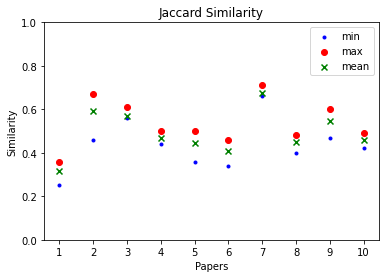

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    main = df0["review"].iloc[i]
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df_asc)):
      if j%10 == i:
        new_df = new_df.append(df_asc.iloc[j])
    vals = jaccard_rel([main], new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/exp2_asc_rel_jaccard', dpi=100)
plt.show()

### Dec order

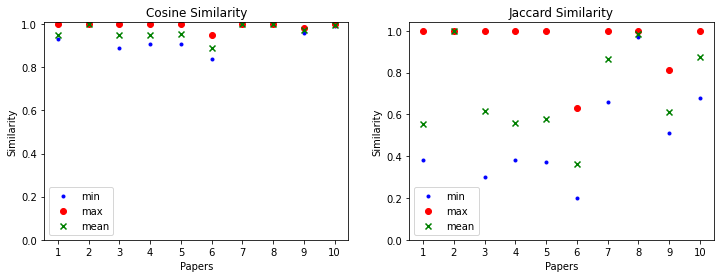

In [ ]:
fig = plt.figure(figsize=(12, 4))
gs = GridSpec(nrows=1, ncols=2)

ax = fig.add_subplot(gs[0, 0])
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_dec)):
      if j%10 == i:
        embeds.append(all_embeddings_dec[f"{j}"])
    vals = cosine(embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

ax1 = fig.add_subplot(gs[0, 1])
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df_dec)):
      if j%10 == i:
        new_df = new_df.append(df_dec.iloc[j])
    vals = jaccard(new_df["review"])
    ax1.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax1.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax1.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax1.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

plt.savefig(f'{path}/Exp1/DEC_inter_results', dpi=100)
plt.show()

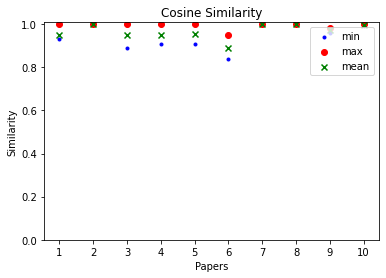

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_dec)):
      if j%10 == i:
        embeds.append(all_embeddings_dec[f"{j}"])
    vals = cosine(embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/exp1_dec_cosine', dpi=100)
plt.show()

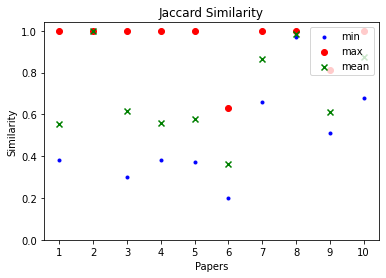

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df_dec)):
      if j%10 == i:
        new_df = new_df.append(df_dec.iloc[j])
    vals = jaccard(new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/exp2_dec_jaccard', dpi=100)
plt.show()

[0.33, 0.29, 0.39, 0.48, 0.39]
[0.65, 0.65, 0.65, 0.65, 0.65]
[0.6, 0.36, 0.58, 0.6, 0.6]
[0.28, 0.33, 0.28, 0.39, 0.3]
[0.56, 0.39, 0.56, 0.47, 0.56]
   review_no     arxivId                                             review
5          1  2005.06628  This paper proposes a pruning approach to redu...
15         1  2005.06628  This paper proposes a method to reduce the num...
25         1  2005.06628  This paper proposes a pruning approach to redu...
35         1  2005.06628  This paper proposes a pruning-based approach t...
45         1  2005.06628  This paper proposes a pruning approach to redu...
This paper proposes a pruning approach to reduce the number of parameters in the BERT model . The main idea is to prune the parameters of each layer of the model by 5 different dimensions . The pruning is done by optimizing the design dimensions in an optimization procedure . The paper is well written and easy to follow . However , I have the following concerns about this paper : 1 . It is 

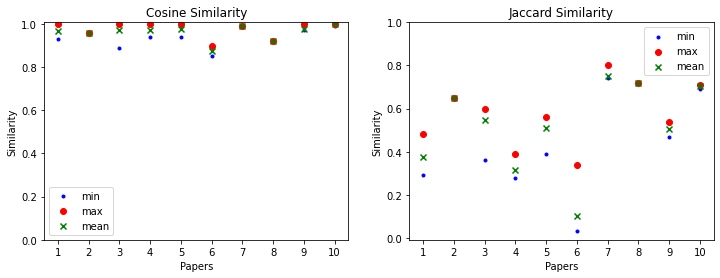

In [ ]:
fig = plt.figure(figsize=(12, 4))
gs = GridSpec(nrows=1, ncols=2)

ax = fig.add_subplot(gs[0, 0])
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_dec)):
      if j%10 == i:
        embeds.append(all_embeddings_dec[f"{j}"])
    vals = cosine_rel(all_embeddings_0[f"{i}"], embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

ax1 = fig.add_subplot(gs[0, 1])
for i in range(10):
    main = df0["review"].iloc[i]
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df_dec)):
      if j%10 == i:
        new_df = new_df.append(df_dec.iloc[j])
    if i==5:
      print(new_df)
      print(main)
    vals = jaccard_rel([main], new_df["review"])
    ax1.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax1.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax1.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax1.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

plt.savefig(f'{path}/Exp1/DEC_intra_results', dpi=100)
plt.show()

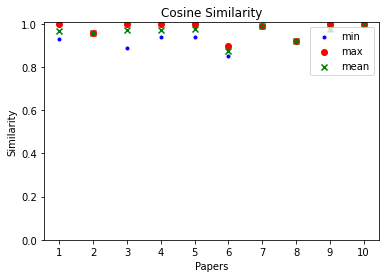

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_dec)):
      if j%10 == i:
        embeds.append(all_embeddings_dec[f"{j}"])
    vals = cosine_rel(all_embeddings_0[f"{i}"], embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/exp1_dec_rel_cosine', dpi=100)
plt.show()

[0.33, 0.29, 0.39, 0.48, 0.39]
[0.65, 0.65, 0.65, 0.65, 0.65]
[0.6, 0.36, 0.58, 0.6, 0.6]
[0.28, 0.33, 0.28, 0.39, 0.3]
[0.56, 0.39, 0.56, 0.47, 0.56]
   review_no     arxivId                                             review
5          1  2005.06628  This paper proposes a pruning approach to redu...
15         1  2005.06628  This paper proposes a method to reduce the num...
25         1  2005.06628  This paper proposes a pruning approach to redu...
35         1  2005.06628  This paper proposes a pruning-based approach t...
45         1  2005.06628  This paper proposes a pruning approach to redu...
This paper proposes a pruning approach to reduce the number of parameters in the BERT model . The main idea is to prune the parameters of each layer of the model by 5 different dimensions . The pruning is done by optimizing the design dimensions in an optimization procedure . The paper is well written and easy to follow . However , I have the following concerns about this paper : 1 . It is 

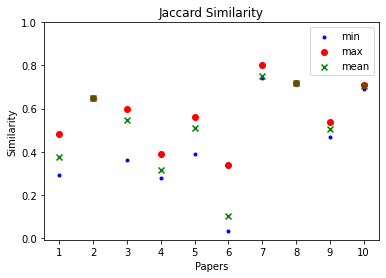

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    main = df0["review"].iloc[i]
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df_dec)):
      if j%10 == i:
        new_df = new_df.append(df_dec.iloc[j])
    if i==5:
      print(new_df)
      print(main)
    vals = jaccard_rel([main], new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/exp2_dec_rel_jaccard', dpi=100)
plt.show()

This paper proposes a method to reduce the number of parameters in the BERT model . The main idea is to use a smaller number of layers in the encoder of BERT . The authors show that this can be achieved by reducing the architecture design dimensions rather than reducing the Transformer encoder layers . The paper is well written and easy to follow . However , I have the following concerns . 1 .The authors claim that the proposed method can be applied towards other objectives such as FLOPs or latency . But the authors do not provide any experimental results to support this claim . 2 .The experimental results are not convincing . The proposed method is only compared with BERT with three layers . It is not clear whether this method can also be applied to other models such as Transformer-based models . 3 .In Table 1 , the authors only show the results for BERT without three layers , which is not enough to show the effectiveness of this method .

----

This paper proposes a pruning approach to reduce the number of parameters in the BERT model . The main idea is to prune the parameters of each layer of the model by 5 different dimensions . The pruning is done by optimizing the design dimensions in an optimization procedure . The paper is well written and easy to follow . However , I have the following concerns about this paper : 1 . It is not clear to me how the proposed pruning method can be applied to other objectives such as FLOPs or latency . 2 .The experiments are only conducted on GLUE and SQuAD datasets . It would be better if the authors can conduct experiments on other NLP tasks such as CIFAR-10/100/MNIST/etc . 3 .The proposed method is not compared with other pruning methods such as DistilBERT ( Sanh et al. , 2019 ) and RoBERTa ( Liu et al .2019 ) .The authors should compare with these methods to show the effectiveness of this method .

## Exp 2

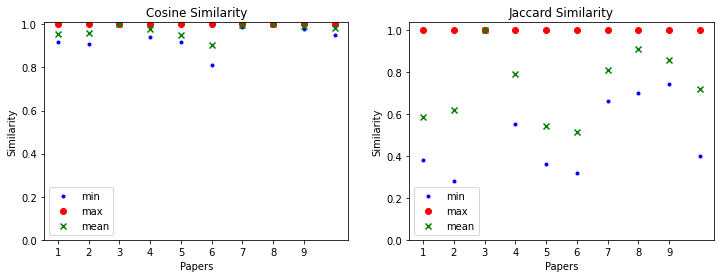

In [ ]:
fig = plt.figure(figsize=(12, 4))
gs = GridSpec(nrows=1, ncols=2)

ax = fig.add_subplot(gs[0, 0])
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_2)):
      if j%10 == i:
        embeds.append(all_embeddings_2[f"{j}"])
    vals = cosine(embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 10))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

ax1 = fig.add_subplot(gs[0, 1])
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df2)):
      if j%10 == i:
        new_df = new_df.append(df2.iloc[j])
    vals = jaccard(new_df["review"])
    ax1.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax1.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax1.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax1.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 10))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

plt.savefig(f'{path}/Exp2/inter_results', dpi=100)
plt.show()

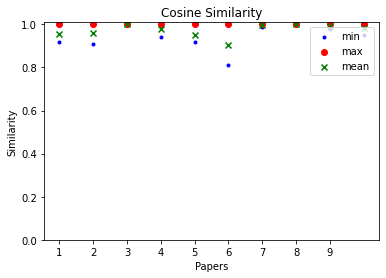

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_2)):
      if j%10 == i:
        embeds.append(all_embeddings_2[f"{j}"])
    vals = cosine(embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 10))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/exp2_cosine', dpi=100)
plt.show()

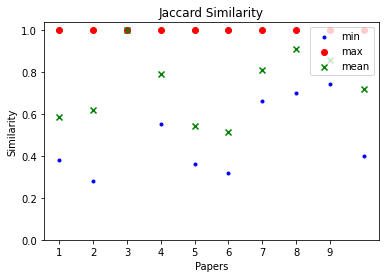

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df2)):
      if j%10 == i:
        new_df = new_df.append(df2.iloc[j])
    vals = jaccard(new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 10))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/exp2_jaccard', dpi=100)
plt.show()

[0.27, 0.32, 0.37, 0.29, 0.29, 0.29, 0.37, 0.29, 0.23, 0.29]
[0.34, 0.74, 0.34, 0.53, 0.74, 0.74, 0.53, 0.74, 0.74, 0.74]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.54, 0.61, 0.55, 0.55, 0.55, 0.51, 0.55, 0.55, 0.55, 0.55]
[0.33, 0.31, 0.39, 0.33, 0.31, 0.31, 0.31, 0.43, 0.38, 0.33]
   review_no     arxivId                                             review
5          1  2005.06628  This paper proposes a pruning approach to redu...
15         1  2005.06628  This paper proposes a pruning approach to redu...
25         1  2005.06628  This paper proposes a method to reduce the num...
35         1  2005.06628  This paper proposes a pruning approach to redu...
45         1  2005.06628  This paper proposes a pruning approach to redu...
55         1  2005.06628  This paper proposes a pruning approach to redu...
65         1  2005.06628  This paper proposes a pruning-based approach t...
75         1  2005.06628  This paper proposes a pruning approach to redu...
85         1  2005.06

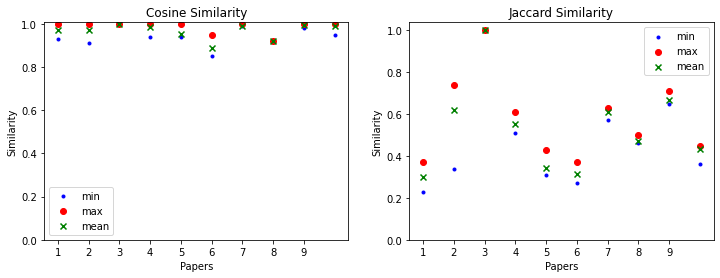

In [ ]:
fig = plt.figure(figsize=(12, 4))
gs = GridSpec(nrows=1, ncols=2)

ax = fig.add_subplot(gs[0, 0])
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_2)):
      if j%10 == i:
        embeds.append(all_embeddings_2[f"{j}"])
    vals = cosine_rel(all_embeddings_0[f"{i}"], embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 10))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

ax1 = fig.add_subplot(gs[0, 1])
for i in range(10):
    main = df0["review"].iloc[i]
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df2)):
      if j%10 == i:
        new_df = new_df.append(df2.iloc[j])
    if i==5:
      print(new_df)
      print(main)
    vals = jaccard_rel([main], new_df["review"])
    ax1.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax1.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax1.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax1.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 10))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

plt.savefig(f'{path}/Exp2/intra_results', dpi=100)
plt.show()

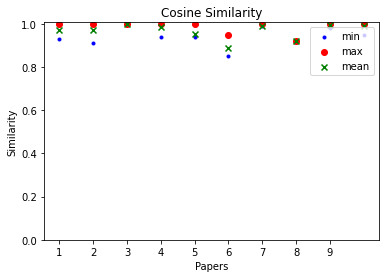

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_2)):
      if j%10 == i:
        embeds.append(all_embeddings_2[f"{j}"])
    vals = cosine_rel(all_embeddings_0[f"{i}"], embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 10))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/exp2_cosine_rel', dpi=100)
plt.show()

[0.27, 0.32, 0.37, 0.29, 0.29, 0.29, 0.37, 0.29, 0.23, 0.29]
[0.34, 0.74, 0.34, 0.53, 0.74, 0.74, 0.53, 0.74, 0.74, 0.74]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.54, 0.61, 0.55, 0.55, 0.55, 0.51, 0.55, 0.55, 0.55, 0.55]
[0.33, 0.31, 0.39, 0.33, 0.31, 0.31, 0.31, 0.43, 0.38, 0.33]
   review_no     arxivId                                             review
5          1  2005.06628  This paper proposes a pruning approach to redu...
15         1  2005.06628  This paper proposes a pruning approach to redu...
25         1  2005.06628  This paper proposes a method to reduce the num...
35         1  2005.06628  This paper proposes a pruning approach to redu...
45         1  2005.06628  This paper proposes a pruning approach to redu...
55         1  2005.06628  This paper proposes a pruning approach to redu...
65         1  2005.06628  This paper proposes a pruning-based approach t...
75         1  2005.06628  This paper proposes a pruning approach to redu...
85         1  2005.06

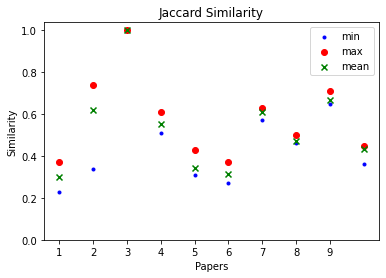

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    main = df0["review"].iloc[i]
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df2)):
      if j%10 == i:
        new_df = new_df.append(df2.iloc[j])
    if i==5:
      print(new_df)
      print(main)
    vals = jaccard_rel([main], new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 10))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/exp2_jaccard_rel', dpi=100)
plt.show()

# BERT embeddings

In [ ]:
def bert_similarity(reviews):
  sentences = [i for i in reviews]
  tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/bert-base-nli-mean-tokens')
  model = AutoModel.from_pretrained('sentence-transformers/bert-base-nli-mean-tokens')

  # initialize dictionary that will contain tokenized sentences
  tokens = {'input_ids': [], 'attention_mask': []}

  for sentence in sentences:
      # tokenize sentence and append to dictionary lists
      new_tokens = tokenizer.encode_plus(sentence, max_length=128, truncation=True,
                                        padding='max_length', return_tensors='pt')
      tokens['input_ids'].append(new_tokens['input_ids'][0])
      tokens['attention_mask'].append(new_tokens['attention_mask'][0])

  # reformat list of tensors into single tensor
  tokens['input_ids'] = torch.stack(tokens['input_ids'])
  tokens['attention_mask'] = torch.stack(tokens['attention_mask'])

  outputs = model(**tokens)

  embeddings = outputs.last_hidden_state

  attention_mask = tokens['attention_mask']
  mask = attention_mask.unsqueeze(-1).expand(embeddings.size()).float()

  masked_embeddings = embeddings * mask
  summed = torch.sum(masked_embeddings, 1)
  summed_mask = torch.clamp(mask.sum(1), min=1e-9)
  mean_pooled = summed / summed_mask
  # convert from PyTorch tensor to numpy array
  mean_pooled = mean_pooled.detach().numpy()

  # calculate
  BERT = cosine_similarity(
      [mean_pooled[0]],
      mean_pooled[1:]
  )

  BERT = BERT.tolist()
  BERT = ["{:.3f}".format(i) for i in BERT[0]]; print(BERT)

  cosine_dist = list(map(float, BERT))
  stats = {
      'min_val': min(cosine_dist),
      'max_val': max(cosine_dist),
      'mean_val': mean(cosine_dist)}

  return stats

# BERT plots

## Exp 1

### Random

['1.000', '0.981', '0.958', '0.954', '0.949', '0.978', '0.954', '0.954', '0.954']
['0.871', '0.990', '0.866', '1.000', '1.000', '0.833', '1.000', '1.000', '1.000']
['1.000', '0.871', '0.871', '1.000', '1.000', '0.965', '1.000', '1.000', '1.000']
['0.995', '0.990', '0.979', '0.990', '0.992', '0.979', '0.990', '0.990', '0.992']
['0.879', '1.000', '0.896', '0.929', '0.905', '0.972', '0.905', '0.896', '0.905']
['0.859', '0.759', '0.759', '0.845', '0.856', '0.845', '0.845', '0.699', '0.845']
['1.000', '1.000', '0.817', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000']
['1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000']
['0.759', '0.759', '0.759', '0.999', '0.955', '0.992', '0.999', '0.860', '0.759']
['0.998', '0.998', '0.998', '0.998', '0.786', '0.998', '0.998', '0.998', '0.998']


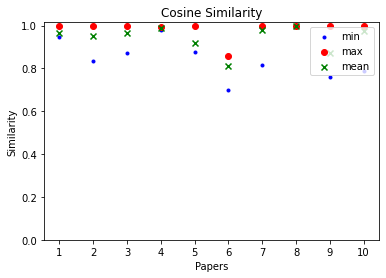

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df1)):
      if j%10 == i:
        new_df = new_df.append(df1.iloc[j])
    vals = bert_similarity(new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/exp1_cosine_BERT', dpi=100)
plt.show()

['0.954', '0.954', '0.953', '0.956', '1.000', '0.965', '0.956', '1.000', '1.000', '1.000']
['1.000', '0.871', '0.990', '0.866', '1.000', '1.000', '0.833', '1.000', '1.000', '1.000']
['1.000', '1.000', '0.871', '0.871', '1.000', '1.000', '0.965', '1.000', '1.000', '1.000']
['0.990', '0.996', '0.990', '0.962', '1.000', '0.996', '0.962', '1.000', '1.000', '0.992']
['0.905', '0.917', '0.905', '0.917', '0.956', '1.000', '0.913', '1.000', '0.917', '1.000']
['0.843', '0.809', '0.892', '0.898', '0.798', '0.800', '0.798', '0.798', '0.851', '0.798']
['0.994', '0.994', '0.994', '0.837', '0.994', '0.994', '0.994', '0.994', '0.994', '0.994']
['0.761', '0.761', '0.763', '0.761', '0.761', '0.761', '0.761', '0.761', '0.761', '0.761']
['0.759', '1.000', '1.000', '1.000', '0.763', '0.778', '0.760', '0.763', '0.887', '1.000']
['0.998', '1.000', '1.000', '1.000', '1.000', '0.796', '1.000', '1.000', '1.000', '1.000']


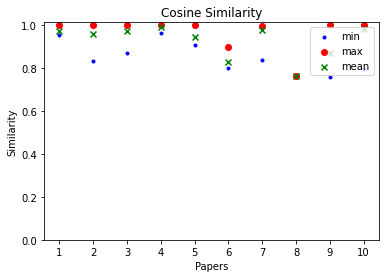

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    new_df = new_df.append(df0.iloc[i])
    for j in range(len(df1)):
      if j%10 == i:
        new_df = new_df.append(df1.iloc[j])
    vals = bert_similarity(new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/exp1_rel_cosine_BERT', dpi=100)
plt.show()

### Asc order

['0.949', '0.948', '1.000', '0.943']
['0.828', '0.828', '0.953', '0.828']
['0.928', '1.000', '1.000', '1.000']
['0.931', '0.925', '0.931', '0.963']
['0.941', '0.915', '0.867', '0.915']
['0.978', '0.982', '0.791', '0.950']
['0.994', '1.000', '1.000', '1.000']
['1.000', '1.000', '1.000', '1.000']
['0.947', '0.749', '0.749', '0.945']
['1.000', '0.998', '1.000', '1.000']


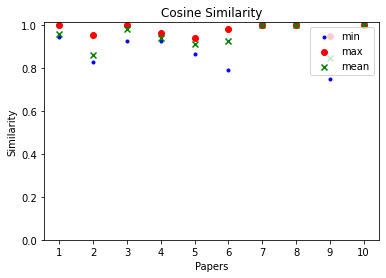

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df_asc)):
      if j%10 == i:
        new_df = new_df.append(df_asc.iloc[j])
    new_df = new_df.dropna()
    vals = bert_similarity(new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/exp1_asc_cosine_BERT', dpi=100)
plt.show()

['1.000', '0.949', '0.948', '1.000', '0.943']
['0.828', '1.000', '1.000', '0.866', '1.000']
['1.000', '0.928', '1.000', '1.000', '1.000']
['0.931', '1.000', '0.996', '1.000', '0.968']
['0.915', '0.934', '1.000', '0.905', '1.000']
['0.921', '0.896', '0.898', '0.854', '0.909']
['0.994', '1.000', '0.994', '0.994', '0.994']
['0.761', '0.761', '0.761', '0.761', '0.761']
['0.749', '0.763', '1.000', '1.000', '0.759']
['1.000', '1.000', '0.998', '1.000', '1.000']


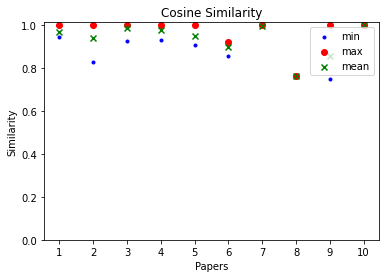

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    new_df = new_df.append(df0.iloc[i])
    for j in range(len(df_asc)):
      if j%10 == i:
        new_df = new_df.append(df_asc.iloc[j])
    new_df = new_df.dropna()
    vals = bert_similarity(new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/exp1_asc_rel_cosine_BERT', dpi=100)
plt.show()

### Dec order

['0.951', '0.965', '0.970', '0.965']
['1.000', '1.000', '1.000', '1.000']
['0.871', '0.929', '1.000', '1.000']
['0.989', '1.000', '0.970', '0.944']
['0.905', '1.000', '0.917', '1.000']
['0.710', '0.827', '0.805', '0.951']
['1.000', '1.000', '1.000', '1.000']
['1.000', '1.000', '1.000', '1.000']
['0.951', '0.941', '0.973', '0.763']
['1.000', '1.000', '1.000', '1.000']


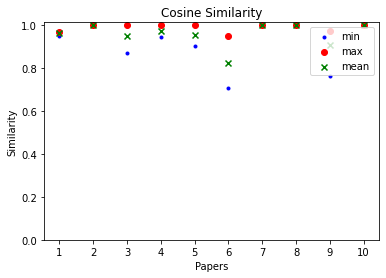

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df_dec)):
      if j%10 == i:
        new_df = new_df.append(df_dec.iloc[j])
    new_df = new_df.dropna()
    vals = bert_similarity(new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/exp1_dec_cosine_BERT', dpi=100)
plt.show()

['0.965', '0.952', '1.000', '0.953', '1.000']
['0.866', '0.866', '0.866', '0.866', '0.866']
['1.000', '0.871', '0.929', '1.000', '1.000']
['1.000', '0.989', '1.000', '0.970', '0.944']
['1.000', '0.905', '1.000', '0.917', '1.000']
['0.948', '0.809', '0.796', '0.798', '0.921']
['0.994', '0.994', '0.994', '0.994', '0.994']
['0.761', '0.761', '0.761', '0.761', '0.761']
['0.763', '0.785', '0.782', '0.791', '1.000']
['1.000', '1.000', '1.000', '1.000', '1.000']


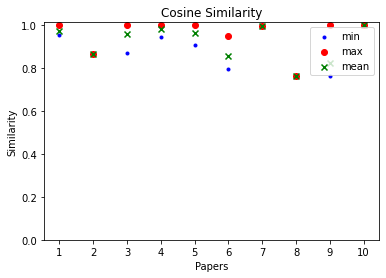

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    new_df = new_df.append(df0.iloc[i])
    for j in range(len(df_dec)):
      if j%10 == i:
        new_df = new_df.append(df_dec.iloc[j])
    new_df = new_df.dropna()
    vals = bert_similarity(new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/exp1_dec_rel_cosine_BERT', dpi=100)
plt.show()

## Exp 2

['0.960', '0.973', '0.945', '0.945', '0.945', '0.973', '0.945', '0.974', '0.945']
['0.864', '1.000', '0.998', '0.864', '0.864', '0.998', '0.864', '0.864', '0.864']
['1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000']
['0.952', '0.960', '0.960', '0.960', '0.980', '0.960', '0.960', '0.960', '0.960']
['0.896', '0.905', '1.000', '0.896', '0.896', '0.896', '0.912', '0.941', '1.000']
['0.779', '0.840', '0.870', '0.807', '0.857', '0.765', '0.818', '0.857', '0.870']
['0.994', '1.000', '1.000', '1.000', '0.994', '0.994', '1.000', '1.000', '1.000']
['1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000']
['1.000', '0.778', '0.778', '0.778', '0.986', '0.778', '0.778', '0.778', '0.778']
['1.000', '1.000', '1.000', '1.000', '0.998', '1.000', '1.000', '0.839', '1.000']


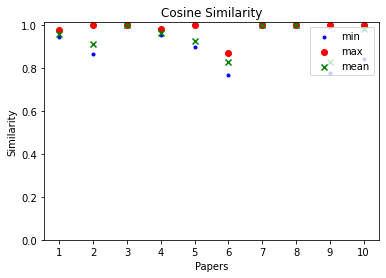

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df2)):
      if j%10 == i:
        new_df = new_df.append(df2.iloc[j])
    new_df = new_df.dropna()
    vals = bert_similarity(new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/exp2_cosine_BERT', dpi=100)
plt.show()

['0.945', '0.958', '0.964', '1.000', '1.000', '1.000', '0.964', '1.000', '0.954', '1.000']
['0.864', '1.000', '0.864', '0.866', '1.000', '1.000', '0.866', '1.000', '1.000', '1.000']
['1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000']
['0.960', '0.990', '1.000', '1.000', '1.000', '0.947', '1.000', '1.000', '1.000', '1.000']
['0.905', '0.917', '1.000', '0.905', '0.917', '0.917', '0.917', '0.929', '0.934', '0.905']
['0.965', '0.822', '0.809', '0.898', '0.827', '0.896', '0.798', '0.843', '0.896', '0.898']
['0.994', '1.000', '0.994', '0.994', '0.994', '1.000', '1.000', '0.994', '0.994', '0.994']
['0.761', '0.761', '0.761', '0.761', '0.761', '0.761', '0.761', '0.761', '0.763', '0.761']
['0.778', '0.778', '1.000', '1.000', '1.000', '0.778', '1.000', '1.000', '1.000', '1.000']
['1.000', '1.000', '1.000', '1.000', '1.000', '0.998', '1.000', '1.000', '0.839', '1.000']


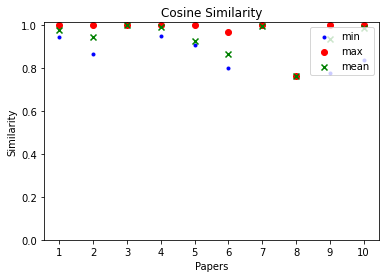

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    new_df = new_df.append(df0.iloc[i])
    for j in range(len(df2)):
      if j%10 == i:
        new_df = new_df.append(df2.iloc[j])
    new_df = new_df.dropna()
    vals = bert_similarity(new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/exp2_rel_cosine_BERT', dpi=100)
plt.show()

# Histograms

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def clean_sentence(review):

  review = re.sub(r'[^\w\s]', '', review)
  
  stop_words = set(stopwords.words('english'))
  
  word_tokens = word_tokenize(review.lower())
  
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  
  filtered_sentence = []
  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)

  return ' '.join(filtered_sentence)

## Exp 1

### Random Shuffling

#### (paper 6)

In [ ]:
for i in range(1):
    i=5
    main = clean_sentence(df0["review"].iloc[i])
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df1)):
      if j%10 == i:
        new_df = new_df.append(df1.iloc[j])
    for i in range(len(new_df)):
      new_df["review"].iloc[i] = clean_sentence(new_df["review"].iloc[i])
    counters = [Counter(i.split(" ")) for i in new_df["review"]]
    main_count = Counter(main.split(" "))
    final_count = Counter()
    final_main = Counter()
    for i in range(10):
      final_main += main_count
      final_count += counters[i]
    # for i in range(len(counters)):
    #   final = final + counters[i]
    # print(final)
    # plt.bar(final.keys(), final.values())

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

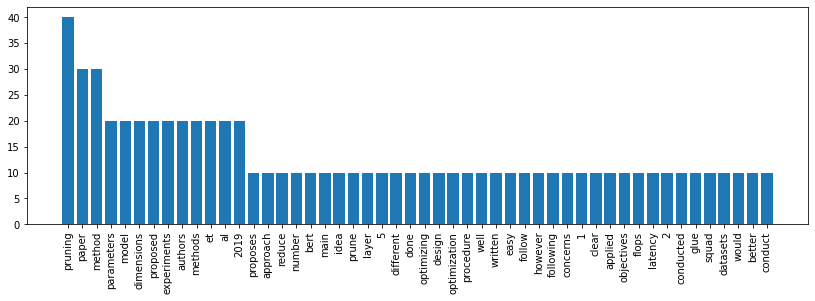

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_main.most_common(50))), list(map(lambda x: x[1], final_main.most_common(50))))
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

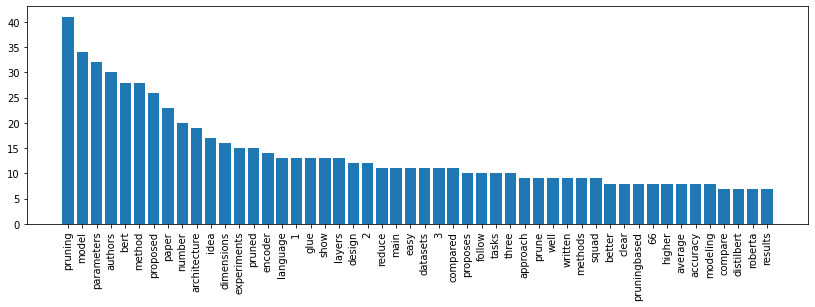

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_count.most_common(50))), list(map(lambda x: x[1], final_count.most_common(50))))
plt.xticks(rotation=90)

#### (All)

In [ ]:
final_df1 = Counter()
final_df0 = Counter()

for i in range(10):
    main = clean_sentence(df0["review"].iloc[i])
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df1)):
      if j%10 == i:
        new_df = new_df.append(df1.iloc[j])
    for i in range(len(new_df)):
      new_df["review"].iloc[i] = clean_sentence(new_df["review"].iloc[i])
    counters = [Counter(i.split(" ")) for i in new_df["review"]]
    main_count = Counter(main.split(" "))
    for i in range(len(counters)):
      final_df0 += main_count
      final_df1 += counters[i]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

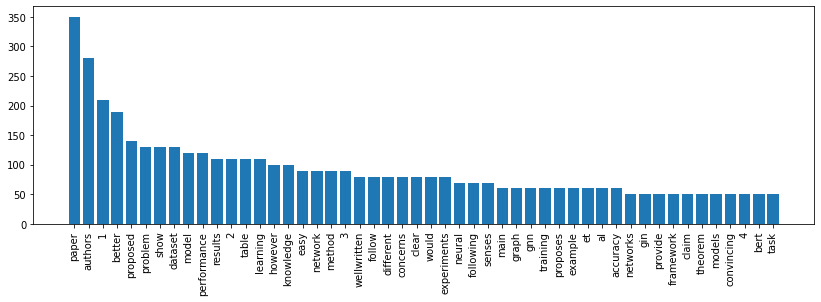

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_df0.most_common(50))), list(map(lambda x: x[1], final_df0.most_common(50))))
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

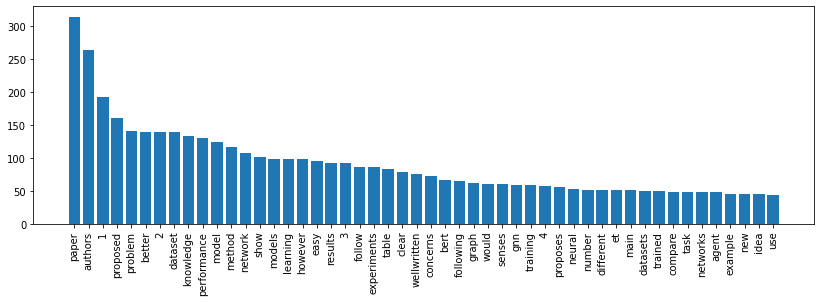

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_df1.most_common(50))), list(map(lambda x: x[1], final_df1.most_common(50))))
plt.xticks(rotation=90)

### Asc order

#### (paper 6)

In [ ]:
for i in range(1):
    i=5
    main = clean_sentence(df0["review"].iloc[i])
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df_asc)):
      if j%10 == i:
        new_df = new_df.append(df_asc.iloc[j])
    for i in range(len(new_df)):
      new_df["review"].iloc[i] = clean_sentence(new_df["review"].iloc[i])
    counters = [Counter(i.split(" ")) for i in new_df["review"]]
    main_count = Counter(main.split(" "))
    final_count = Counter()
    final_main = Counter()
    for i in range(len(counters)):
      final_main += main_count
      final_count += counters[i]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

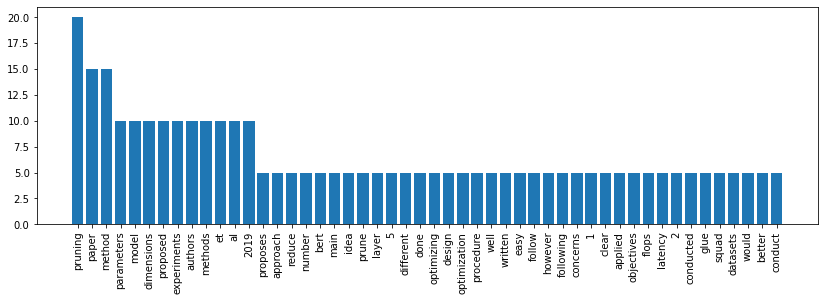

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_main.most_common(50))), list(map(lambda x: x[1], final_main.most_common(50))))
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

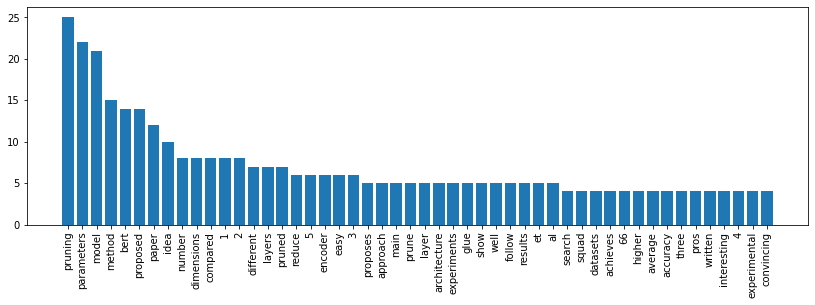

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_count.most_common(50))), list(map(lambda x: x[1], final_count.most_common(50))))
plt.xticks(rotation=90)

#### (All)

In [ ]:
final_df_asc = Counter()
final_df0 = Counter()

for i in range(10):
    main = clean_sentence(df0["review"].iloc[i])
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df_asc)):
      if j%10 == i:
        new_df = new_df.append(df_asc.iloc[j])
    for i in range(len(new_df)):
      new_df["review"].iloc[i] = clean_sentence(new_df["review"].iloc[i])
    counters = [Counter(i.split(" ")) for i in new_df["review"]]
    main_count = Counter(main.split(" "))
    for i in range(len(counters)):
      final_df0 += main_count
      final_df_asc += counters[i]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

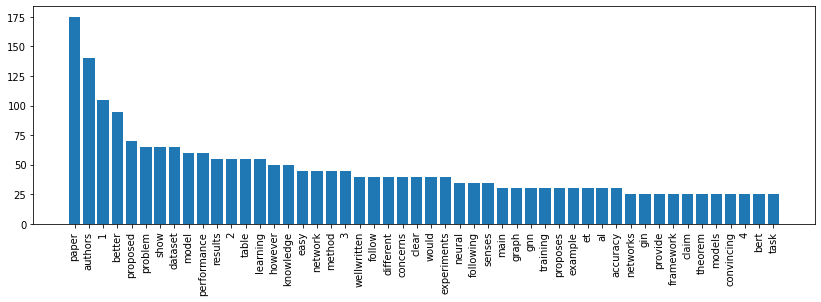

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_df0.most_common(50))), list(map(lambda x: x[1], final_df0.most_common(50))))
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

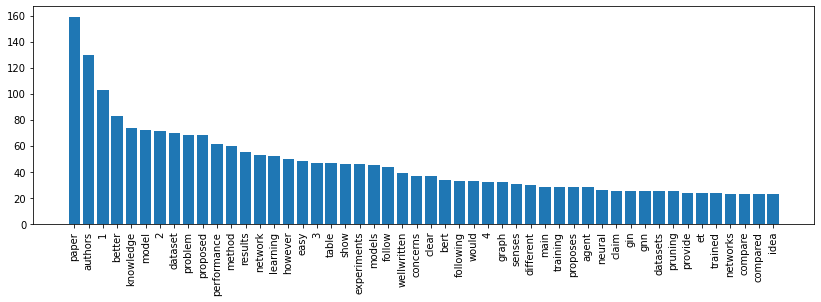

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_df_asc.most_common(50))), list(map(lambda x: x[1], final_df_asc.most_common(50))))
plt.xticks(rotation=90)

### Desc order

#### (paper 6)

In [ ]:
for i in range(1):
    i=5
    main = clean_sentence(df0["review"].iloc[i])
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df_dec)):
      if j%10 == i:
        new_df = new_df.append(df_dec.iloc[j])
    for i in range(len(new_df)):
      new_df["review"].iloc[i] = clean_sentence(new_df["review"].iloc[i])
    counters = [Counter(i.split(" ")) for i in new_df["review"]]
    main_count = Counter(main.split(" "))
    final_count = Counter()
    final_main = Counter()
    for i in range(len(counters)):
      final_main += main_count
      final_count += counters[i]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

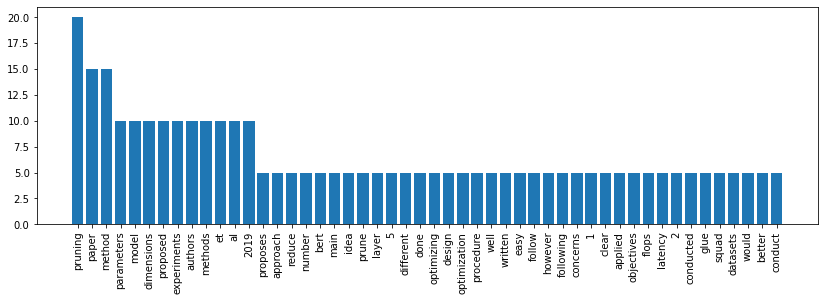

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_main.most_common(50))), list(map(lambda x: x[1], final_main.most_common(50))))
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

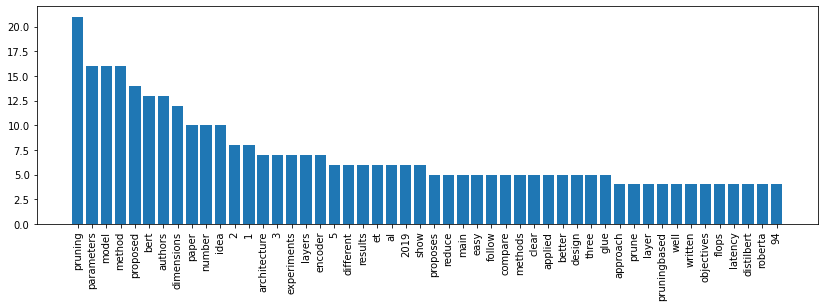

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_count.most_common(50))), list(map(lambda x: x[1], final_count.most_common(50))))
plt.xticks(rotation=90)

#### (All)

In [ ]:
final_df_dec = Counter()
final_df0 = Counter()

for i in range(10):
    main = clean_sentence(df0["review"].iloc[i])
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df_dec)):
      if j%10 == i:
        new_df = new_df.append(df_dec.iloc[j])
    for i in range(len(new_df)):
      new_df["review"].iloc[i] = clean_sentence(new_df["review"].iloc[i])
    counters = [Counter(i.split(" ")) for i in new_df["review"]]
    main_count = Counter(main.split(" "))
    for i in range(len(counters)):
      final_df0 += main_count
      final_df_dec += counters[i]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

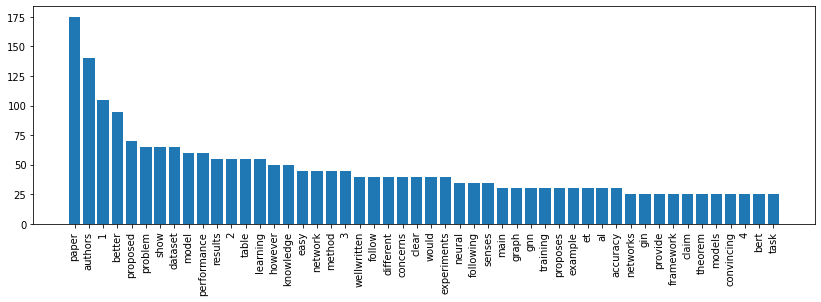

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_df0.most_common(50))), list(map(lambda x: x[1], final_df0.most_common(50))))
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

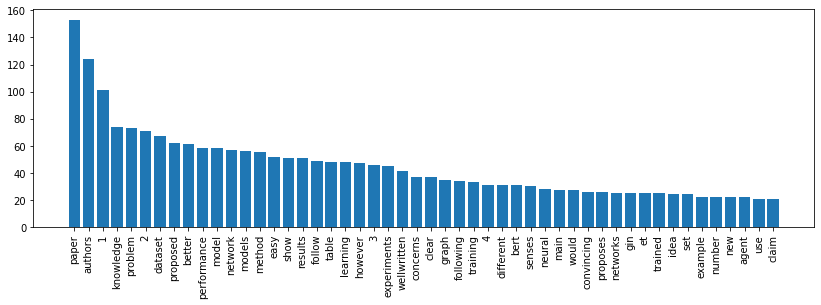

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_df_dec.most_common(50))), list(map(lambda x: x[1], final_df_dec.most_common(50))))
plt.xticks(rotation=90)

## Exp 2

### (paper 6)

In [ ]:
for i in range(1):
    i=5
    main = clean_sentence(df0["review"].iloc[i])
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df2)):
      if j%10 == i:
        new_df = new_df.append(df2.iloc[j])
    for i in range(len(new_df)):
      new_df["review"].iloc[i] = clean_sentence(new_df["review"].iloc[i])
    counters = [Counter(i.split(" ")) for i in new_df["review"]]
    main_count = Counter(main.split(" "))
    final_count = Counter()
    final_main = Counter()
    for i in range(len(counters)):
      final_main += main_count
      final_count += counters[i]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

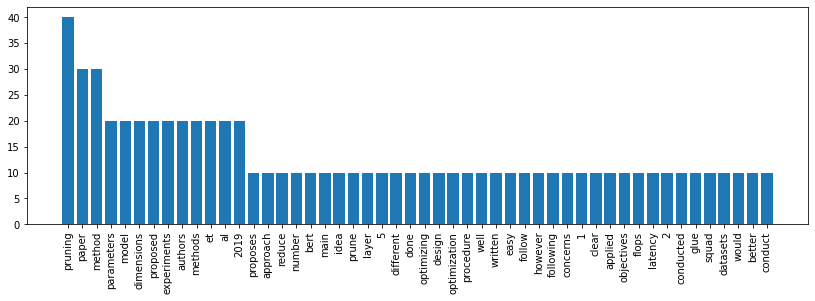

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_main.most_common(50))), list(map(lambda x: x[1], final_main.most_common(50))))
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

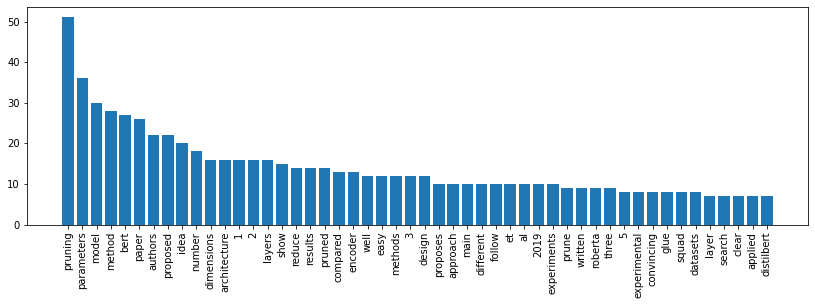

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_count.most_common(50))), list(map(lambda x: x[1], final_count.most_common(50))))
plt.xticks(rotation=90)

### (All)

In [ ]:
final_df2 = Counter()
final_df0 = Counter()

for i in range(10):
    main = clean_sentence(df0["review"].iloc[i])
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df2)):
      if j%10 == i:
        new_df = new_df.append(df2.iloc[j])
    for i in range(len(new_df)):
      new_df["review"].iloc[i] = clean_sentence(new_df["review"].iloc[i])
    counters = [Counter(i.split(" ")) for i in new_df["review"]]
    main_count = Counter(main.split(" "))
    for i in range(len(counters)):
      final_df0 += main_count
      final_df2 += counters[i]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

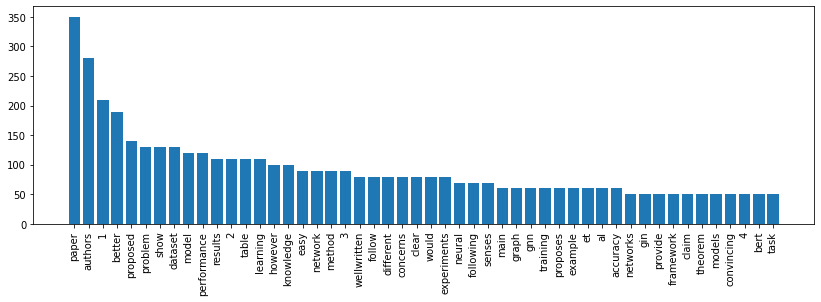

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_df0.most_common(50))), list(map(lambda x: x[1], final_df0.most_common(50))))
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

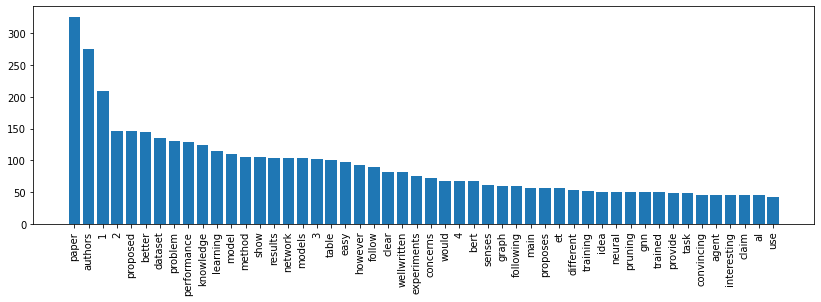

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_df2.most_common(50))), list(map(lambda x: x[1], final_df2.most_common(50))))
plt.xticks(rotation=90)